# 类型一览
1. 容器序列
    list tuple collections.deque
2. 扁平序列
    str 、 bytes 、 bytearray 、 memoryview 和 array.array
区别：容器序列存放的是它们所包含的任意类型的对象的引用
    扁平序列里存放的是值而不是引用，换句话说扁平序列其实是一段连续的内存空间

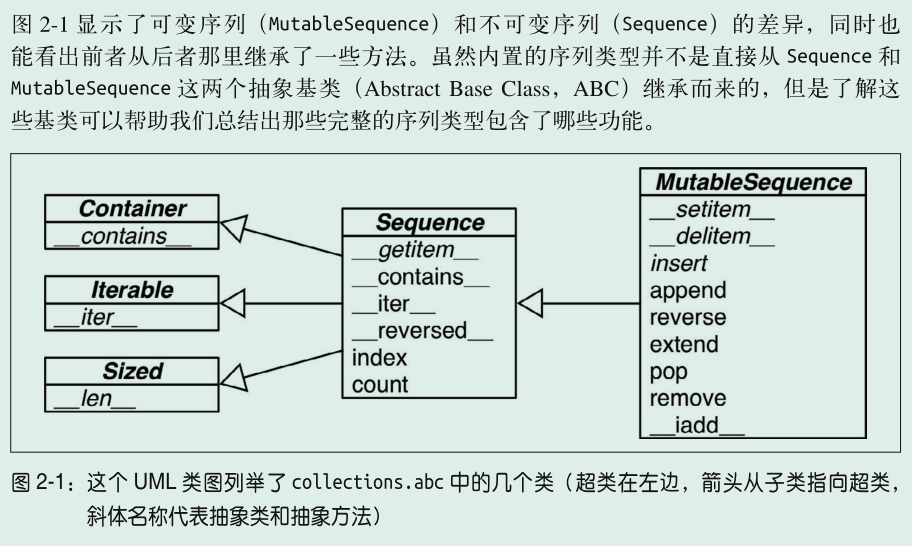

# 列表推导和生成器表达式
1. 列表推导不会再有变量泄漏的问题
2. 列表推导 和 map,filter

In [1]:
# 把字符串变成 Unicode 码位的列表推导式写法
symbols = '$¢£¥€¤'
codes = [ord(symbol) for symbol in symbols]
codes

[36, 162, 163, 165, 8364, 164]

In [7]:
# 笛卡尔积
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

### 生成器表达式

In [4]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [5]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

# 元组
1. 元组中的每个元素都存放了记录中一个字段的数据，外加这个数据的位置
2. 正是这个位置信息给数据赋予了意义

In [11]:
# 元组和记录
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)

traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),('ESP', 'XDA205856')]
for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

BRA/CE342567
ESP/XDA205856
USA/31195855


In [18]:
# 元组拆包
# 元组拆包可以应用到任何可迭代对象上，唯一的硬性要求是，被可迭代对象中的元素数量必须要跟接受这些元素的元组的空档数一致
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates

# 元组拆包应用于交换变量
a = 3
b = 4
b, a = a, b 
a,b

(4, 3)

In [17]:
# _占位符 ，略掉其他所有不感兴趣的元素
import os
_, filename = os.path.split('/home/luciano/.ssh/idrsa.pub')
filename

'idrsa.pub'

In [19]:
# 用 * 来处理剩下的元素
a, b, *rest = range(5)
rest

[2, 3, 4]

In [22]:
# 插在中间，其他位置单个匹配， 它接收其他所有剩余的值
a, *body, c, d = range(5)
body,type(body)

([1, 2], list)

In [24]:
# 嵌套元组拆包
metro_areas = [
('Tokyo','JP',36.933,(35.689722,139.691667)), 
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

name, cc, pop, (latitude, longitude) = metro_areas[0]
name, cc,pop,(latitude,longitude)

('Tokyo', 'JP', 36.933, (35.689722, 139.691667))

In [35]:
# 作为不可变列表的元组
my_tuple = (1,2,3,4)
list(reversed(my_tuple))

[4, 3, 2, 1]

# 切片
1.  s[a:b:c] 的形式对 s 在 a 和 b 之间以 c 为间隔取值。 c 的值还可以为负，负值意味着反向取值。

In [36]:
s = 'bicyle'
s[::-1]

'elycib'

In [37]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
del l[1:3]
l

[0, 3, 4, 5, 6, 7, 8, 9]

### 对序列使用 + 和 *

In [39]:
l = [1, 2, 3]
l*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [40]:
l+l

[1, 2, 3, 1, 2, 3]

In [42]:
# 注意如果，l里面有其他的引用，那么将会产生意想不到的效果
l = [1,2,[3,4]]
nl = l*2
nl

[1, 2, [3, 4], 1, 2, [3, 4]]

In [44]:
nl[2][0] = 'x'
nl

[1, 2, ['x', 4], 1, 2, ['x', 4]]

### 由列表组成的列表

In [41]:
board = [['_'] * 3 for i in range(3)] 
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

# 序列的增量赋值
1. += 背后的特殊方法是 __iadd__
2. *= 对应的是 __imul__ 

In [45]:
# 一个关于+=的迷思
t = (1, 2, [30, 40])
t[2] += [50, 60]
t

TypeError: 'tuple' object does not support item assignment

#  list.sort 方法和内置函数 sorted
1. list.sort 方法会就地排序列表，也就是说不会把原列表复制一份
    random,shuffle 函数也遵守了这个惯例
2.  sorted ，它会新建一个列表作为返回值
不管是 list.sort 方法还是 sorted 函数，都有两个可选的关键字参数:
reverse=True/False:降序升序输出，默认为False
key排序关键字

# 用 bisect 来管理已排序的序列

### bisect 
bisect(haystack, needle) 在 haystack （干草垛）里搜索 needle （针）的位置，该位置满
足的条件是，把 needle 插入这个位置之后， haystack 还能保持升序。

In [ ]:
# 在有序序列中用 bisect 查找某个元素的插入位置


# 用 bisect.insort 插入新元素

# 当列表不是首选时
1. 如果我们需要一个只包含数字的列表，那么 array.array 比 list 更高效
2. 数组支持所有跟可变序列有关的操作，包括 .pop 、 .insert 和 .extend
3. 数组还提供从文件读取和存入文件的更快的方法，如 .frombytes 和 .tofile

# 内存视图 memoryview

# NumPy和SciPy

# 双向队列和其他形式的队列
1. from collections import deque 使用双向队列
2. queue
3. multiprocessing
4. asyncio
5. heapq